#  General PipeLine for A Algorithm in MachineLearning
the complete structure of a machine‑learning pipeline, from installing dependencies to visualizing outputs.

# 1. Installing libraries
Install all required dependencies (run **once**).

In [1]:
# Install core libraries
!pip install numpy pandas scikit-learn matplotlib seaborn

# 2. Importing libraries
Importing All librairies that we need 

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import os
print(os.getcwd())  # Esto te mostrará desde dónde se está ejecutando el código

c:\Users\Socio\Downloads


# 3.1 Importing the dataset Housing
Load your dataset (CSV, Parquet, SQL, etc.).

In [7]:

# Example: read a CSV file
df = pd.read_csv('housing.csv')df.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 3.2 Data exploration and cleaning(Housing)
Inspect statistical summaries and handle missing values or outliers.

In [8]:
# Quick data overview
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 3.3 Data preparation
Select features and target, encode categorical variables, and scale numerical values.

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# TODO: define numeric_features and categorical_features
# preprocessor = ColumnTransformer([...])

# 4.1 Importing the dataset(Train)
Load your dataset (CSV, Parquet, SQL, etc.). Number2 'train'

In [11]:


# Example: read a CSV file
df_train = pd.read_csv('housing.csv')df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 4.2 Data exploration and cleaning
Inspect statistical summaries and handle missing values or outliers.

In [12]:

# Quick data overview
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 5.0 VISUALIZE THE DATA
##5.1 Histograma y Grafico de barras
###let´s visualize the distribution of median house value (histograma)
###Proximidad al al mar (grafico de barras)

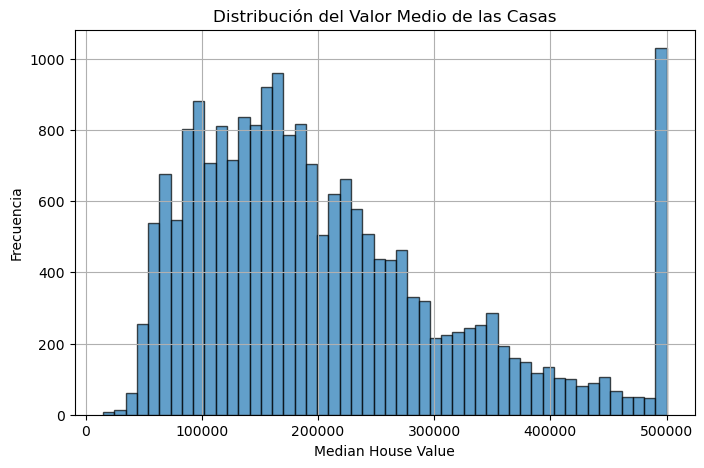

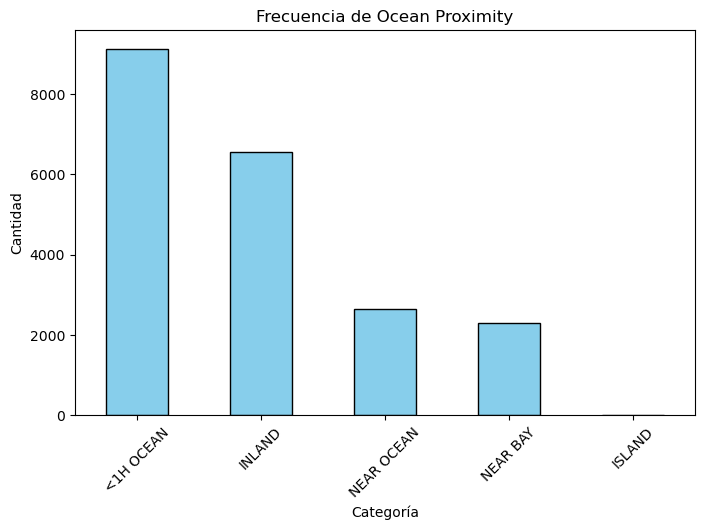

In [14]:
# Histograma para la distribución del valor medio de las casas
plt.figure(figsize=(8, 5))
plt.hist(df['median_house_value'], bins=50, alpha=0.7, edgecolor='black')
plt.title("Distribución del Valor Medio de las Casas")
plt.xlabel("Median House Value")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# Gráfico de barras para la variable categórica "ocean_proximity"
plt.figure(figsize=(8, 5))
df['ocean_proximity'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Frecuencia de Ocean Proximity")
plt.xlabel("Categoría")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()


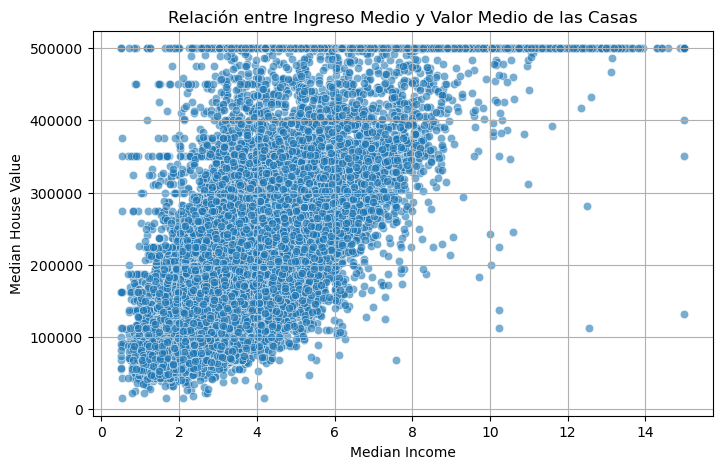

In [17]:
# Crear scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['median_income'], y=df['median_house_value'], alpha=0.6)

# Personalizar la visualización
plt.title("Relación entre Ingreso Medio y Valor Medio de las Casas")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.grid(True)

# Mostrar gráfico
plt.show()

In [18]:
import pandas as pd

df = pd.read_csv('housing.csv')print(df.info())  # Información sobre las variables y tipos de datos
print(df.head())  # Primeras filas del dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.8

In [19]:
numeric_df = df.select_dtypes(include=['number'])  # Filtrar solo columnas numéricas
print(numeric_df.head())  # Ver las primeras filas


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  
3       558.0       219.0         5.6431            341300.0  
4       565.0       259.0         3.8462            342200.0  


# 5.2 ANALISIS MULTIVARIABLE
##CORRELATION MATRIX

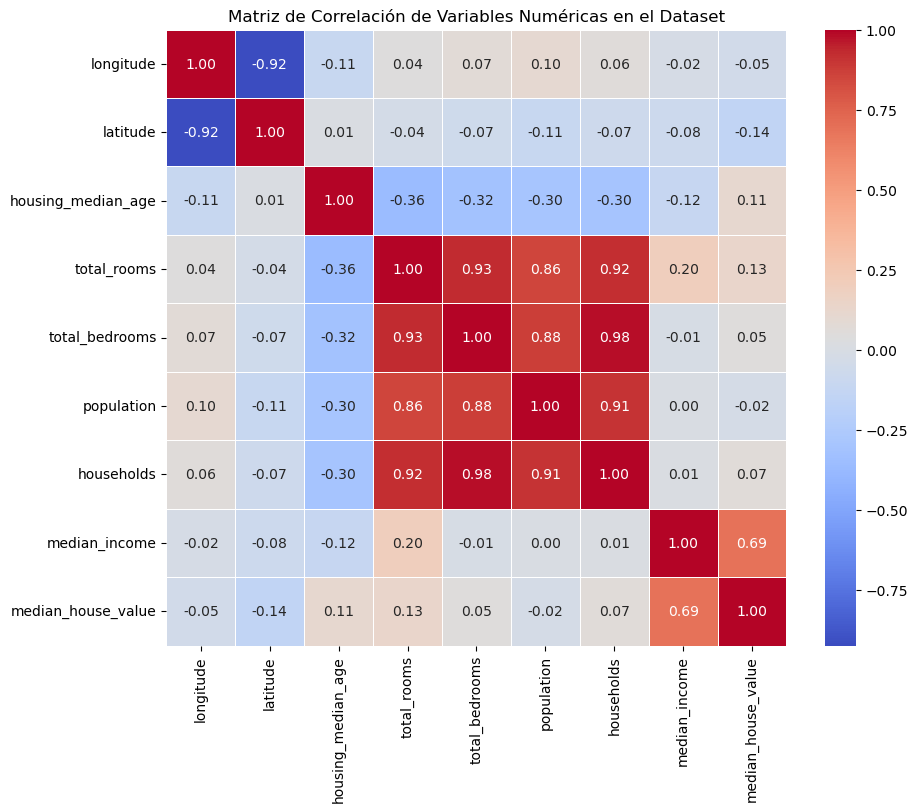

In [20]:
# Filtrar solo las variables numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Personalizar el título
plt.title("Matriz de Correlación de Variables Numéricas en el Dataset")
plt.show()

6. PREPROCESS THE DATA

6.1 HANDLE MISSING VALUES

C:\Users\Socio\AppData\Local\Temp\ipykernel_3900\3625601471.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


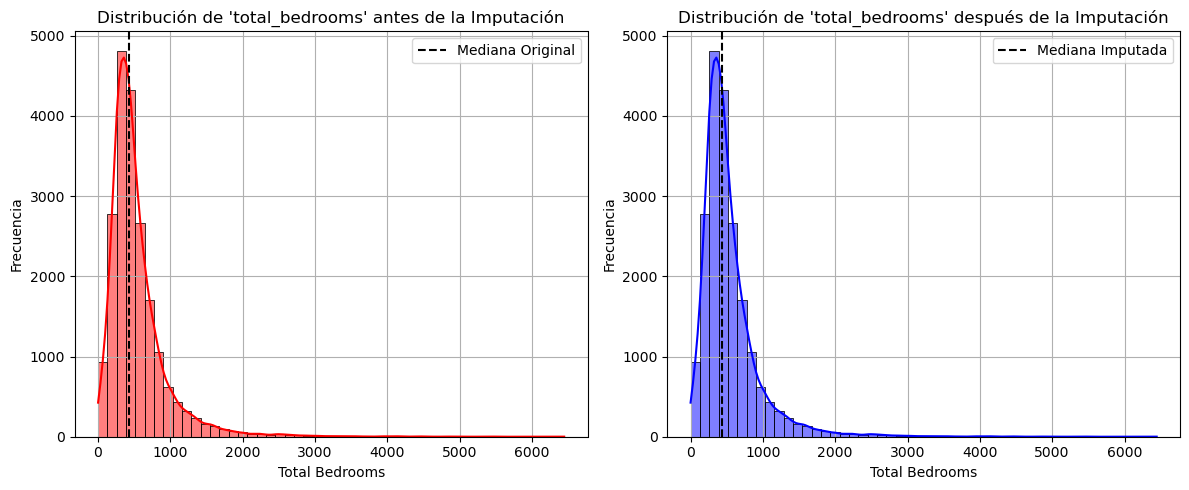

In [23]:
# Guardar copia del dataset original antes de la imputación
df_before = df.copy()

# Imputar valores faltantes con la mediana
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

# Crear una figura con dos subgráficos (antes y después)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma antes de la imputación
sns.histplot(df_before['total_bedrooms'], bins=50, kde=True, color="red", ax=axes[0])
axes[0].axvline(df_before['total_bedrooms'].median(), color='black', linestyle='dashed', label="Mediana Original")
axes[0].set_title("Distribución de 'total_bedrooms' antes de la Imputación")
axes[0].set_xlabel("Total Bedrooms")
axes[0].set_ylabel("Frecuencia")
axes[0].legend()
axes[0].grid(True)

# Histograma después de la imputación
sns.histplot(df['total_bedrooms'], bins=50, kde=True, color="blue", ax=axes[1])
axes[1].axvline(df['total_bedrooms'].median(), color='black', linestyle='dashed', label="Mediana Imputada")
axes[1].set_title("Distribución de 'total_bedrooms' después de la Imputación")
axes[1].set_xlabel("Total Bedrooms")
axes[1].set_ylabel("Frecuencia")
axes[1].legend()
axes[1].grid(True)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

C:\Users\Socio\AppData\Local\Temp\ipykernel_3900\2809946724.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)
C:\Users\Socio\AppData\Local\Temp\ipykernel_3900\2809946724.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Antes de la imputación', 'Después de la imputación'], y=[missing_before, missin

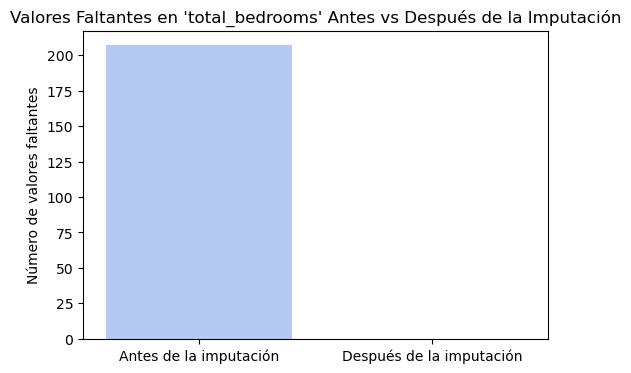

In [21]:
# Cargar el dataset
df = pd.read_csv('housing.csv')
# Ver cantidad de valores faltantes antes de la imputación
missing_before = df['total_bedrooms'].isnull().sum()

# Imputar valores faltantes con la mediana
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

# Ver cantidad de valores faltantes después de la imputación
missing_after = df['total_bedrooms'].isnull().sum()

# Graficar comparación de valores faltantes
plt.figure(figsize=(6, 4))
sns.barplot(x=['Antes de la imputación', 'Después de la imputación'], y=[missing_before, missing_after], palette='coolwarm')
plt.ylabel('Número de valores faltantes')
plt.title("Valores Faltantes en 'total_bedrooms' Antes vs Después de la Imputación")
plt.show()

6.2 ENCODE CATEGORICALS VARIABLES 

In [27]:
from sklearn.preprocessing import OneHotEncoder

# Aplicar OneHotEncoding
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Corrección del argumento

encoded_categories = encoder.fit_transform(df[['ocean_proximity']])

# Convertir a DataFrame con nombres de columnas adecuados
encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Unir con el dataset original excluyendo la columna original
df_encoded = df.drop(columns=['ocean_proximity']).join(encoded_df)

# Visualizar las primeras filas
print(df_encoded.head())



   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                     0.0                     0.0                       1.0   
1     

6.3 FEATURE SCALING+FULL PREPROCESSOR

In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Definir columnas numéricas y categóricas
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                    'population', 'households', 'median_income']
categorical_features = ['ocean_proximity']

# Pipeline para características numéricas (imputación con mediana + escalado)
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline para características categóricas (OneHotEncoding)
categorical_transformer = OneHotEncoder(drop="first", sparse_output=False)

# ColumnTransformer para combinar ambos pipelines
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# Aplicar el preprocesamiento al dataset
df_preprocessed = preprocessor.fit_transform(df)

print("Preprocesamiento completado. Datos transformados listos para usar en modelos de Machine Learning.")


Preprocesamiento completado. Datos transformados listos para usar en modelos de Machine Learning.


In [29]:
import pandas as pd

# Aplicar el preprocesamiento
X_scaled = preprocessor.fit_transform(df)

# Obtener nombres de las columnas transformadas
encoded_columns = preprocessor.get_feature_names_out()
all_columns = list(encoded_columns)

# Convertir el resultado en un DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=all_columns)

# Mostrar resumen estadístico de las características escaladas
print(X_scaled_df.describe())


       num__longitude  num__latitude  num__housing_median_age  \
count    2.064000e+04   2.064000e+04             2.064000e+04   
mean    -8.526513e-15  -1.079584e-15             5.508083e-18   
std      1.000024e+00   1.000024e+00             1.000024e+00   
min     -2.385992e+00  -1.447568e+00            -2.196180e+00   
25%     -1.113209e+00  -7.967887e-01            -8.453931e-01   
50%      5.389137e-01  -6.422871e-01             2.864572e-02   
75%      7.784964e-01   9.729566e-01             6.643103e-01   
max      2.625280e+00   2.958068e+00             1.856182e+00   

       num__total_rooms  num__total_bedrooms  num__population  \
count      2.064000e+04         2.064000e+04     2.064000e+04   
mean       3.201573e-17        -9.363741e-17    -1.101617e-17   
std        1.000024e+00         1.000024e+00     1.000024e+00   
min       -1.207283e+00        -1.277688e+00    -1.256123e+00   
25%       -5.445698e-01        -5.718868e-01    -5.638089e-01   
50%       -2.332104e-01 

7. SPLIT THE DATA 

7.1 Separate features and target variable

7.2 Split the database in to training and test

7.3 Display dimensions to verify the split

X_train: (16512, 9)
X_test: (4128, 9)
y_train: (16512,)
y_test: (4128,)


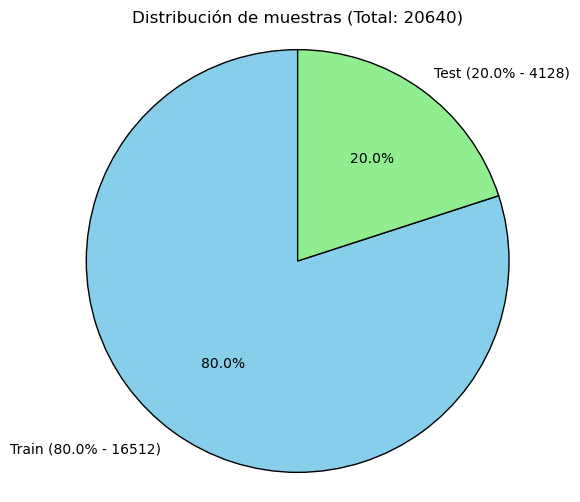

In [30]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Separar variables predictoras (X) y objetivo (y)
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

# Dividir en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar dimensiones de los conjuntos
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Calcular totales y porcentajes
train_rows = X_train.shape[0]
test_rows = X_test.shape[0]
total_rows = train_rows + test_rows
train_pct = round((train_rows / total_rows) * 100, 2)
test_pct = round((test_rows / total_rows) * 100, 2)

# Configuración del gráfico de pastel
labels = [f"Train ({train_pct}% - {train_rows})", f"Test ({test_pct}% - {test_rows})"]
sizes = [train_rows, test_rows]
colors = ['skyblue', 'lightgreen']

# Generar gráfico
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90, wedgeprops={"edgecolor": "black"})
plt.title(f"Distribución de muestras (Total: {total_rows})")
plt.axis('equal')  # Para asegurar que el gráfico sea circular
plt.show()
